# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively
they predict instances of fraud using data based on [this dataset from
Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction.
Features include confidential variables `V1` through `V28` as well as
`Amount` which is the amount of the transaction.
 
The target is stored in the `class` column, where a value of 1 corresponds to
an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


%matplotlib notebook

## Question 1

Import the data from `fraud_data.csv`. What percentage of the observations in
the dataset are instances of fraud?

*This function should return a float between 0 and 1.*

In [2]:
def answer_one():

    # Read the csv file, and create a DataFrame:
    df = pd.read_csv('fraud_data.csv')

    # Create a Series containing the targets:
    target = df.iloc[:, -1]

    # Compute the number of instances of fraud:
    num_fraud = target[target == 1].size

    # Compute the total number of observations:
    num_obs = target.size

    # Compute the ratio between num_fraud and num_obs:
    ratio = num_fraud / num_obs

    return ratio


answer_one()

0.016410823768035772

In [3]:
# Read the csv file, and create a DataFrame:
df = pd.read_csv('fraud_data.csv')

# Extract the features and targets from this DataFrame:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split this data into training and test sets.
# Use X_train, X_test, y_train and y_test for all of the following questions.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Question 2

Using `X_train`, `X_test`, `y_train` and `y_test` (as defined above), train
a dummy classifier that classifies everything as the majority class of the
training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e.,
`(accuracy score, recall score)`.*

In [4]:
def answer_two():

    # Create a DummyClassifier object:
    clf = DummyClassifier(strategy='most_frequent')

    # Fit this classifier using the training data:
    clf.fit(X_train, y_train)

    # Compute the accuracy of this classifier using the test data:
    accuracy = clf.score(X_test, y_test)

    # Get the predictions for the test data, and compute the recall:
    y_test_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_test_pred)

    return (accuracy, recall)


answer_two()

(0.9852507374631269, 0.0)

## Question 3

Using `X_train`, `X_test`, `y_train` and `y_test` (as defined above), train a
SVC classifier using the default parameters. What is the accuracy, recall,
and precision of this classifier?

*This function should a return a tuple with three floats, i.e.,
`(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():

    # Create an SVC object:
    clf = SVC()

    # Fit this classifier using the training data:
    clf.fit(X_train, y_train)

    # Compute the accuracy using the test data:
    accuracy = clf.score(X_test, y_test)

    # Get the predictions for the test data:
    y_test_pred = clf.predict(X_test)

    # Compute the recall:
    recall = recall_score(y_test, y_test_pred)

    # Compute the precision:
    precision = precision_score(y_test, y_test_pred)

    return (accuracy, recall, precision)


answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

## Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what
is the confusion matrix when using a threshold of -220 on the decision
function? Use `X_test` and `y_test`.

*This function should return a confusion matrix, a 2x2 numpy array with 4
integers.*

In [6]:
def answer_four():

    # Create an SVC object with the parameters specified above:
    clf = SVC(C=1e9, gamma=1e-7)

    # Fit this classifier using the training data:
    clf.fit(X_train, y_train)

    # Get the predictions for the test data:
    y_test_pred = (clf.decision_function(X_test) > -220).astype(int)

    # Compute the confusion matrix:
    confusion = confusion_matrix(y_test, y_test_pred)

    return confusion


answer_four()

array([[5320,   24],
       [  14,   66]])

## Question 5

Train a logistic regression classifier with default parameters using `X_train`
and `y_train`.

For the logistic regression classifier, create a precision recall curve and a
ROC curve using `y_test` and the probability estimates for `X_test` (probability
it is fraud).

Looking at the precision recall curve, what is the recall when the precision
is `0.75`?

Looking at the ROC curve, what is the true positive rate when the false
positive rate is `0.16`?

*This function should return a tuple with two floats, i.e.,
`(recall, true positive rate)`.*

In [7]:
def answer_five():

    # Create a LogisticRegression object:
    clf = LogisticRegression(solver='liblinear')

    # Fit this classifier using the training data:
    clf.fit(X_train, y_train)

    # Compute the probability estimates using the test data:
    probs = clf.predict_proba(X_test)[:, 1]

    # Use these probabilities and y_test to compute precision-recall pairs:
    precisions, recalls, _ = precision_recall_curve(y_test, probs)

    # Get the recall value corresponding to a precision of 0.75:
    recall = recalls[np.abs(precisions - 0.75).argmin()]

    # Use probs and y_test to compute false/true positive rates:
    fprs, tprs, _ = roc_curve(y_test, probs)

    # Get the true positive rate corresponding to a false positive rate of 0.16:
    tpr = tprs[np.abs(fprs - 0.16).argmin()]

    return (recall, tpr)


answer_five()

(0.825, 0.9375)

## Question 6

Perform a grid search over the parameters listed below for a Logistic
Regression classifier, using recall for scoring and the default 3-fold cross
validation.

`'penalty': ['l1', 'l2']`

`'C': [0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each
parameter combination, i.e.,

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**  	|    ?	|   ? 	|

*This function should return a 5 by 2 numpy array with 10 floats.*

*Note: Do not return a DataFrame, just the values denoted by '?' above in a
numpy array. You might need to reshape your raw result to meet the format we
are looking for.*

In [8]:
def answer_six():

    # Parameters of the GridSearchCV object (as specified above):
    estimator = LogisticRegression(solver='liblinear')
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100]
    }
    scoring = 'recall'
    cv = 3

    # Create the GridSearchCV object:
    gs_lr = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring, cv=cv)

    # Using the training data, run fit with all sets of parameters:
    gs_lr.fit(X_train, y_train)

    # Create a DataFrame containing all of the results:
    results = pd.DataFrame(data=gs_lr.cv_results_)

    # Keep only the columns that matter, and sort the DataFrame by the values of C:
    results = results.loc[:, ['param_C', 'param_penalty', 'mean_test_score']].sort_values(by='param_C')

    # Get the mean test scores corresponding to the 'l1' penalty:
    mts_l1 = results.mean_test_score[results.param_penalty == 'l1'].values.reshape((-1, 1))

    # Get the mean test scores corresponding to the 'l2' penalty:
    mts_l2 = results.mean_test_score[results.param_penalty == 'l2'].values.reshape((-1, 1))

    # Stack these arrays horizontally to get the final result:
    mts = np.hstack((mts_l1, mts_l2))

    return mts


answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

<IPython.core.display.Javascript object>


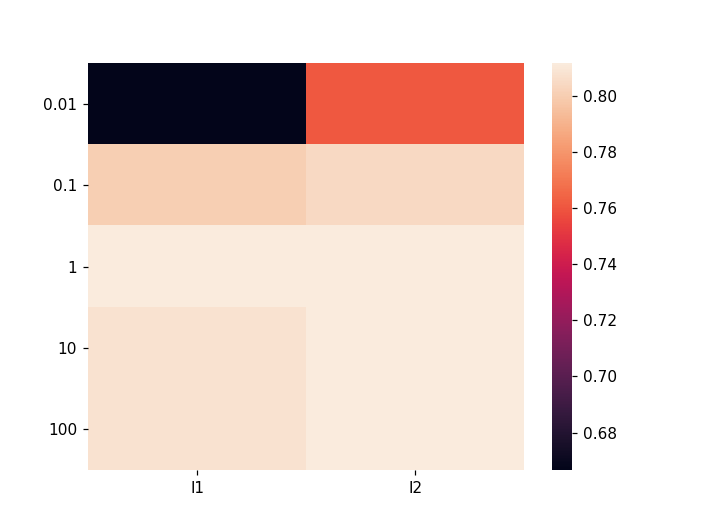

In [9]:
def GridSearch_Heatmap(scores):
    """Function for visualizing the results from the grid search."""
    plt.figure()
    sns.heatmap(scores.reshape(5, 2), xticklabels=['l1', 'l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);


GridSearch_Heatmap(answer_six())